[[ 0.70886129  0.57562789  0.42921793 ...  0.27541086  0.42921793
   0.57562789]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 ...
 [ 0.27541086  0.09046523 -0.09334004 ... -0.26940744 -0.09334004
   0.09046523]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]]


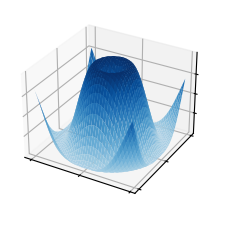

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print(Z)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In [14]:
R = 1 # sphere radius
T = 1 # simulation time

j = 0.01 # dp
k = 0.00001 # dt

p = np.arange(0, R+j, j)
t = np.arange(0, T+k, k)

n = len(p)
m = len(t)

T = np.zeros((n, m+1)) # includes ghost node

T[0, :] = 20
T[:, 0] = 100

factor = k/(j**2)

if factor > 0.5:
    print("Factor is too large")

for i in range(1, n):
    for j in range(1, m):
        T[i,j] = (1-2*factor)*T[i-1,j] + factor*(T[i-1,j-1] + T[i-1,j+1])
        T[i,-1] = T[i,-3]

T = T[:, :-1] # remove ghost node

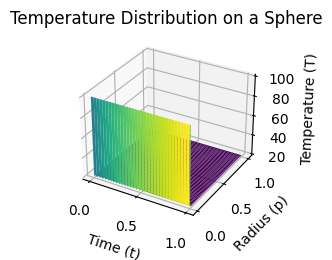

In [20]:
# Create meshgrid
pp, tt = np.meshgrid(p, t)

T = T.transpose()

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(pp, tt, T, cmap='viridis')

# Add labels and title
ax.set_xlabel('Time (t)')
ax.set_ylabel('Radius (p)')
ax.set_zlabel('Temperature (T)')
ax.set_title('Temperature Distribution on a Sphere')

# Show the plot
plt.show()